In [21]:
from google.colab import drive

In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
%cd "/content/drive/My Drive/1_processing/w2v_cnn/per_module"

/content/drive/My Drive/1_processing/w2v_cnn/per_module


In [24]:
# from utils_train2 import *

In [25]:
import pandas as pd
import numpy as np
import pickle
import spacy  # For preprocessing
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from gensim.models import KeyedVectors

In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from random import choice

In [27]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [28]:
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

In [29]:
from nltk.tokenize import word_tokenize

In [88]:
with open('mutated2.pkl', 'rb') as input_file:
    mutated = pickle.load(input_file)   
mutated.columns

Index(['repo_count', 'task_name', 'method_description', 'mod_keys_found',
       'mod_values_found', 'key_module_text', 'value_module_text',
       'mod_keys_found_string', 'found_used_parameters', 'has_params',
       'third_ast', 'third_tokens', 'token_task_names', 'descr_one_string',
       'consistent', 'task_com', 'task_complete'],
      dtype='object')

In [89]:
# mutated = mutated.rename(columns={'consistent':'incosistent'})
# mutated['incosistent'] = mutated['incosistent'].map({True:False,False:True})

In [90]:
# print(mutated.loc[0,'incosistent'])
# mutated.loc[10396,'incosistent']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
train, test = train_test_split(mutated, test_size=0.1, random_state=42)
print(train['mod_keys_found_string'].value_counts()) 
test['mod_keys_found_string'].value_counts()

shell           3827
command         3074
set_fact        2224
template        2177
file            2075
copy            1381
gather_facts    1357
service         1016
debug            871
fail             710
Name: mod_keys_found_string, dtype: int64


shell           425
command         330
set_fact        268
file            227
template        219
copy            165
gather_facts    147
service         122
debug            97
fail             80
Name: mod_keys_found_string, dtype: int64

In [93]:
test.columns

Index(['repo_count', 'task_name', 'method_description', 'mod_keys_found',
       'mod_values_found', 'key_module_text', 'value_module_text',
       'mod_keys_found_string', 'found_used_parameters', 'has_params',
       'third_ast', 'third_tokens', 'token_task_names', 'descr_one_string',
       'consistent', 'task_com', 'task_complete'],
      dtype='object')

In [94]:
task_names_sent_train = [row for row in train['token_task_names']]
method_descr_sent_train = [row for row in train['third_tokens']]

task_names_sent_test = [row for row in test['token_task_names']]
method_descr_sent_test = [row for row in test['third_tokens']]

In [95]:
tagged_data_names_train = [TaggedDocument(d, [i]) for i, d in enumerate(task_names_sent_train)]
tagged_data_methods_train = [TaggedDocument(d, [i]) for i, d in enumerate(method_descr_sent_train)]

tagged_data_names_test = [TaggedDocument(d, [i]) for i, d in enumerate(task_names_sent_test)]
tagged_data_methods_test = [TaggedDocument(d, [i]) for i, d in enumerate(method_descr_sent_test)]

In [96]:
tagged_data_methods_train[1524]

TaggedDocument(words=['TaskDescription', 'shell', 'bash', '/root/opentlc-sample-config.sh'], tags=[1524])

In [ ]:
# model_names = Doc2Vec(tagged_data_names_train, dm = 1, vector_size=300, window=5, min_count=1, alpha = 0.025, workers=4, epochs = 1000)
# model_descriptions = Doc2Vec(tagged_data_methods_train, dm = 1, vector_size=300, window=5, min_count=1, alpha = 0.025, workers=4, epochs = 1000)

Streaming output truncated to the last 5000 lines.
INFO - 22:03:35: worker thread finished; awaiting finish of 2 more threads
INFO - 22:03:35: worker thread finished; awaiting finish of 1 more threads
INFO - 22:03:35: worker thread finished; awaiting finish of 0 more threads
INFO - 22:03:35: EPOCH - 286 : training on 293745 raw words (246852 effective words) took 2.9s, 84832 effective words/s
INFO - 22:03:36: EPOCH 287 - PROGRESS: at 31.42% examples, 71227 words/s, in_qsize 7, out_qsize 0
INFO - 22:03:38: EPOCH 287 - PROGRESS: at 71.59% examples, 78460 words/s, in_qsize 8, out_qsize 0
INFO - 22:03:38: worker thread finished; awaiting finish of 3 more threads
INFO - 22:03:38: worker thread finished; awaiting finish of 2 more threads
INFO - 22:03:38: worker thread finished; awaiting finish of 1 more threads
INFO - 22:03:38: worker thread finished; awaiting finish of 0 more threads
INFO - 22:03:38: EPOCH - 287 : training on 293745 raw words (246614 effective words) took 2.8s, 89190 effect

In [ ]:
# model_names.save("model_task_names_doc2vec.model")
# model_descriptions.save("model_method_descr_doc2vec.model")

INFO - 23:48:05: saving Doc2Vec object under model_task_names_doc2vec.model, separately None
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
INFO - 23:48:07: saved model_task_names_doc2vec.model
INFO - 23:48:07: saving Doc2Vec object under model_method_descr_doc2vec.model, separately None
INFO - 23:48:08: saved model_method_descr_doc2vec.model


In [97]:
task_names_d2v = KeyedVectors.load('model_task_names_doc2vec.model')
model_method_descr_d2v = KeyedVectors.load('model_method_descr_doc2vec.model')

INFO - 20:33:37: loading Word2VecKeyedVectors object from model_task_names_doc2vec.model
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
INFO - 20:33:38: loading vocabulary recursively from model_task_names_doc2vec.model.vocabulary.* with mmap=None
INFO - 20:33:38: loading trainables recursively from model_task_names_doc2vec.model.trainables.* with mmap=None
INFO - 20:33:38: loading wv recursively from model_task_names_doc2vec.model.wv.* with mmap=None
INFO - 20:33:38: loading docvecs recursively from model_task_names_doc2vec.model.docvecs.* with mmap=None
INFO - 20:33:38: loaded model_task_names_doc2vec.model
INFO - 20:33:38: loading Word2VecKeyedVectors object from model_method_descr

In [98]:
task_names_d2v.docvecs.most_similar(positive=[task_names_d2v.infer_vector(test['token_task_names'][10512])],topn=1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(17441, 0.9172955751419067)]

In [99]:
model_method_descr_d2v.docvecs.most_similar(positive=[model_method_descr_d2v.infer_vector(test['third_tokens'][10512])],topn=1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(13660, 0.9125697612762451)]

In [100]:
def assess_model(task_name, description,task_names_model,descriptions_model):

  flag = ''
  tn = list(task_name)
  des = list(description)

  task_name_ids = task_names_model.docvecs.most_similar(positive=[task_names_model.infer_vector(tn)],topn=40)
  description_ids = descriptions_model.docvecs.most_similar(positive=[descriptions_model.infer_vector(des)],topn=40)
                                          
  task_ids = []
  descr_ids = []
  
  for el in task_name_ids:
    task_ids.append(el[0])

  for elem in description_ids:
    descr_ids.append(elem[0])
  
  if set(task_ids) & set(descr_ids):
    flag = True
  else:
    flag = False

  return flag

In [101]:
test['predicted'] = test.apply(lambda x: assess_model(x['token_task_names'],x['third_tokens'], task_names_d2v,model_method_descr_d2v),axis=1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
test['predicted'].value_counts()

False    1149
True      931
Name: predicted, dtype: int64

In [103]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test['consistent'], test['predicted'])
cnf_matrix

array([[856, 177],
       [293, 754]])

In [104]:
x_axis_labels = ['consistent', ] # labels for x-axis
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(cnf_matrix, annot=True, cmap='Blues',linewidths=.5, ax=ax,fmt='g')
ax.figure.savefig('k40_confusion_matrix.png')

<IPython.core.display.Javascript object>

INFO - 20:39:43: NumExpr defaulting to 2 threads.


In [105]:
accuracy = round((cnf_matrix[0][0]+cnf_matrix[1][1])/(cnf_matrix[0][0]+cnf_matrix[0][1]+cnf_matrix[1][1]+cnf_matrix[1][0]),5)
accuracy

0.77404

In [106]:
tp = cnf_matrix[1][1]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
tn= cnf_matrix[0][0]
all_val = tp+fp+fn+tn

In [107]:
precision_positive = round(tp/(tp+fp),3)
precision_positive

0.81

In [108]:
recall_positive = round(tp/(tp+fn), 3)
recall_positive

0.72

In [109]:
precision_negative = round(tn/(tn+fn),3)
precision_negative

0.745

In [110]:
recall_negative = round(tn/(tn+fp), 3)
recall_negative

0.829

In [111]:
f1_score_positive = (2*precision_positive*recall_positive)/(precision_positive+recall_positive)
f1_score_positive

0.7623529411764707

In [112]:
f1_score_negative = (2*precision_negative*recall_negative)/(precision_negative+recall_negative)
f1_score_negative

0.7847585768742059

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.plot([1,1.6,3])

In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# from matplotlib import pyplot

In [115]:
ns_probs = [0 for _ in range(len(test))]

In [116]:
ns_auc = roc_auc_score(test['consistent'], ns_probs)
lr_auc = roc_auc_score(test['consistent'], test['predicted'])

In [117]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Our model: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Our model: ROC AUC=0.774


In [120]:
plt.rcParams['font.family']

['sans-serif']

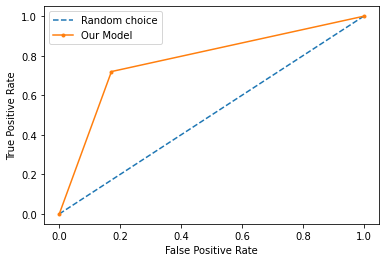

In [118]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test['consistent'], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test['consistent'], test['predicted'])

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random choice')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Our Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('k40_roc_curve.jpg')
plt.show()